# First Stage: Data Preprocessing 
## Data Cleaning Steps
* 1- Handling Nulls
* 2- Remove Duplicated Data
* 3- Processing Skewed Data
* 4- Normalization (Using MinMaxScaler)
* 5- Get Correlation Between Numerical Data

In [173]:
import pandas as pd
import numpy as np 

import seaborn as sb 
import matplotlib.pylab as plt
%matplotlib inline

# from sklearn.preprocessing import StandardScaler    #mean norm (x-mean)/std   2/3 of data in range -1 to 1 and mean =0
from sklearn.preprocessing import MinMaxScaler      #range from 0 to 1

# First: Collecting the Data

In [174]:
housing = pd.read_csv("Ames_Housing_Data1.tsv", sep='\t')
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


# 1- Handling Nulls

In [175]:
null_columns = housing.isnull().sum().sort_values(ascending=False)
null_columns[null_columns != 0]        # 27 columns

Pool QC           2918
Misc Feature      2825
Alley             2733
Fence             2359
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64

In [176]:
# Drop first five columns in null_columns because they are useless as they have a huge number of null values
housing = housing.drop(null_columns.index[0:5], axis=1)
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000


In [177]:
null_columns = housing.isnull().sum().sort_values(ascending=False)
null_columns = null_columns[null_columns != 0]        # 22 columns
null_columns

Lot Frontage      490
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
Bsmt Qual          80
BsmtFin Type 1     80
Bsmt Cond          80
Mas Vnr Area       23
Mas Vnr Type       23
Bsmt Full Bath      2
Bsmt Half Bath      2
BsmtFin SF 2        1
Electrical          1
BsmtFin SF 1        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Cars         1
Garage Area         1
dtype: int64

In [178]:
# housing.shape
for i in null_columns.index:
    print(housing[i].dtype == object)

False
False
True
True
True
True
True
True
True
True
True
False
True
False
False
False
True
False
False
False
False
False


In [179]:
# Replace nan numerical values with mean of its columns and drop string nan values
for i in null_columns.index:
    if(housing[i].dtype != object):
        mean = housing[i].mean()
        housing[i].fillna(mean, inplace= True)
    else:
        housing.dropna(subset=[i], inplace=True)

In [180]:
# Check if there any other nan values
housing.isnull().sum().sum()

0

# 2- Remobve Duplicated Data

In [181]:
housing.duplicated().sum()

1

In [182]:
housing = housing.drop_duplicates()
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


# 3- Processing Skewed Data

# But we need to save the price column in a separate column to use in the ML stage

In [183]:
price_column = housing[['SalePrice']].copy()
price_column.head()

,SalePrice
0,215000
2,105000
3,172000
4,244000
5,189900


# Fisrt: Get numerical data only

In [184]:
# Get the numerical data only from housing DataFrame
housing_numerical = housing.select_dtypes(include= ['float64', 'int64']).copy()
housing_numerical.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
2,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
3,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
4,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
5,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


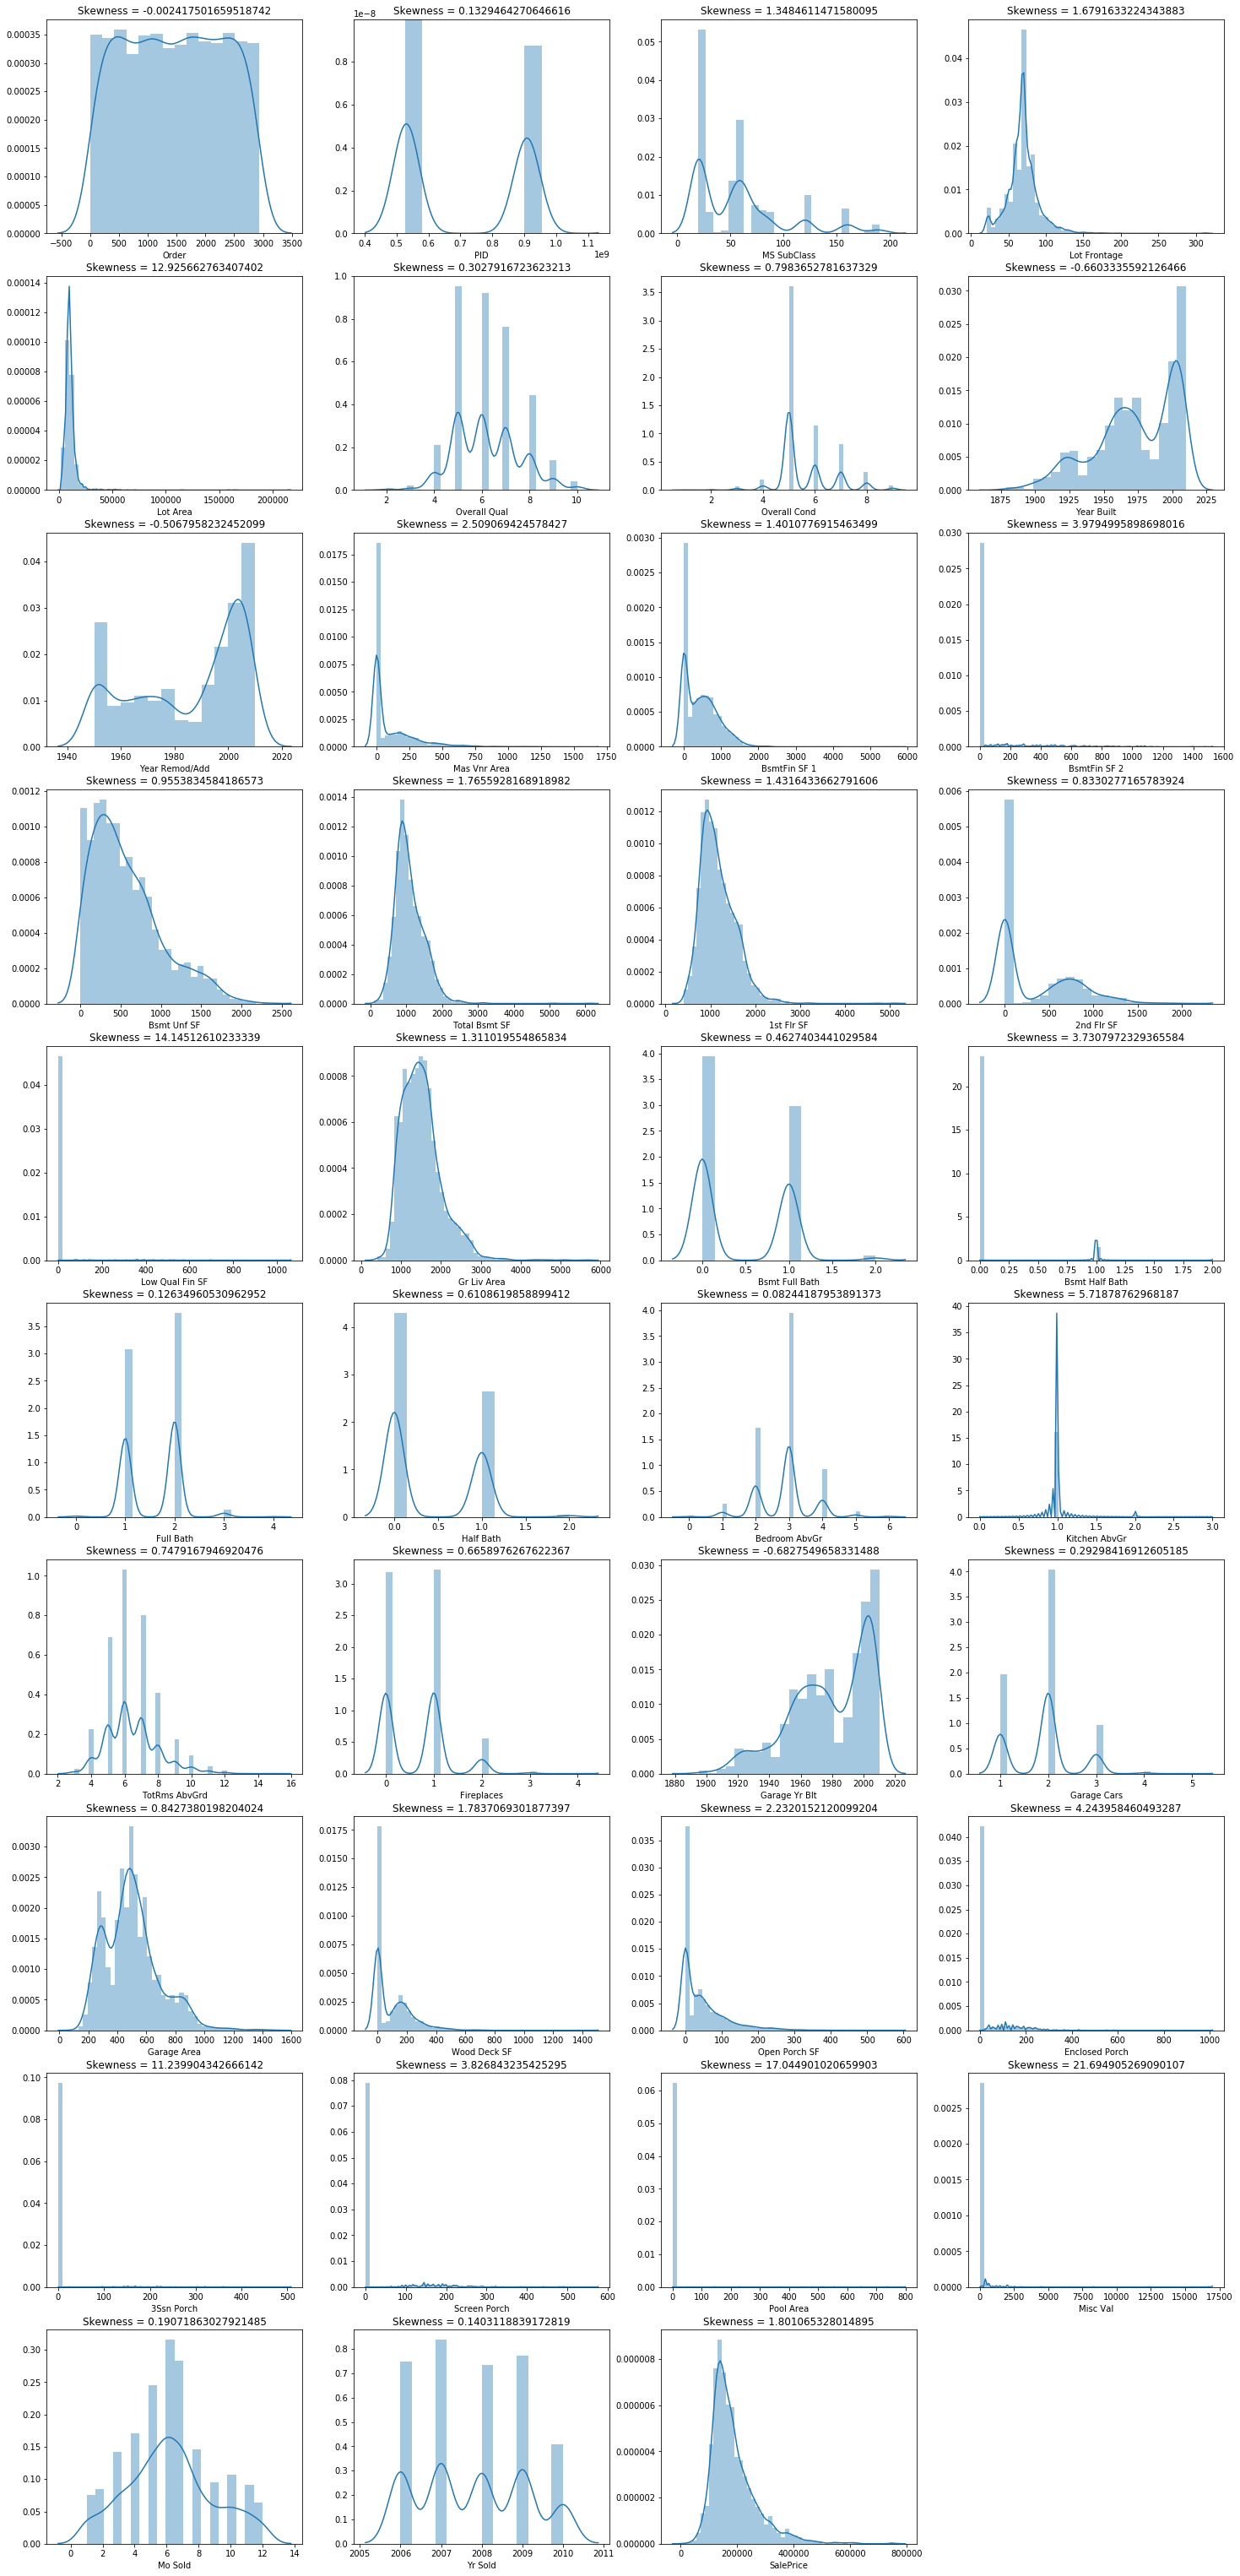

In [185]:
plt.figure(figsize=[25,55])
for i in range(0, housing_numerical.shape[1]):
    plt.subplot(10, 4, i+1)
    column = housing[housing_numerical.columns[i]]
    sb.distplot(column)
    plt.title(f"Skewness = {column.skew()}")

In [186]:
# # Use log tranform to reduce the skewness of the data
# plt.figure(figsize=[25,55])
# for i in range(0, housing_numerical.shape[1]):
#     plt.subplot(10, 4, i+1)
#     column = housing[housing_numerical.columns[i]].copy()
#     if(abs(column.skew()) > 0.5):
#         column = np.log1p(housing[housing_numerical.columns[i]])               # Use log(x+1) to take log(x=0) without errors
#         housing.loc[ : , housing_numerical.columns[i]] = column                # Update the DataFrame
        
#     sb.distplot(column)
#     plt.title(f"Skewness = {column.skew()}")


# 4- Normalization (Using MinMaxScaler for numerical data only)

In [211]:
# Normalize the numerical data only in the DataFrame
housing_normalized = housing.copy()
housing_normalized[housing_numerical.columns] = MinMaxScaler().fit_transform(housing_normalized[housing_numerical.columns])
housing_normalized.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0.000000,0.000000,0.000000,RL,0.410959,0.142420,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.000000,0.0,0.000000,0.363636,1.0,WD,Normal,0.272444
2,0.000341,0.000102,0.000000,RH,0.202055,0.048246,Pave,Reg,Lvl,AllPub,...,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,WD,Normal,0.124238
3,0.000683,0.000104,0.000000,RL,0.205479,0.060609,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,WD,Normal,0.214509
4,0.001024,0.000108,0.000000,RL,0.246575,0.046087,Pave,Reg,Lvl,AllPub,...,0.0,0.0,0.000000,0.0,0.000000,0.272727,1.0,WD,Normal,0.311517
5,0.001366,0.001672,0.235294,RL,0.181507,0.058566,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,WD,Normal,0.238626


# 5- Get Correlation Between Numerical Data

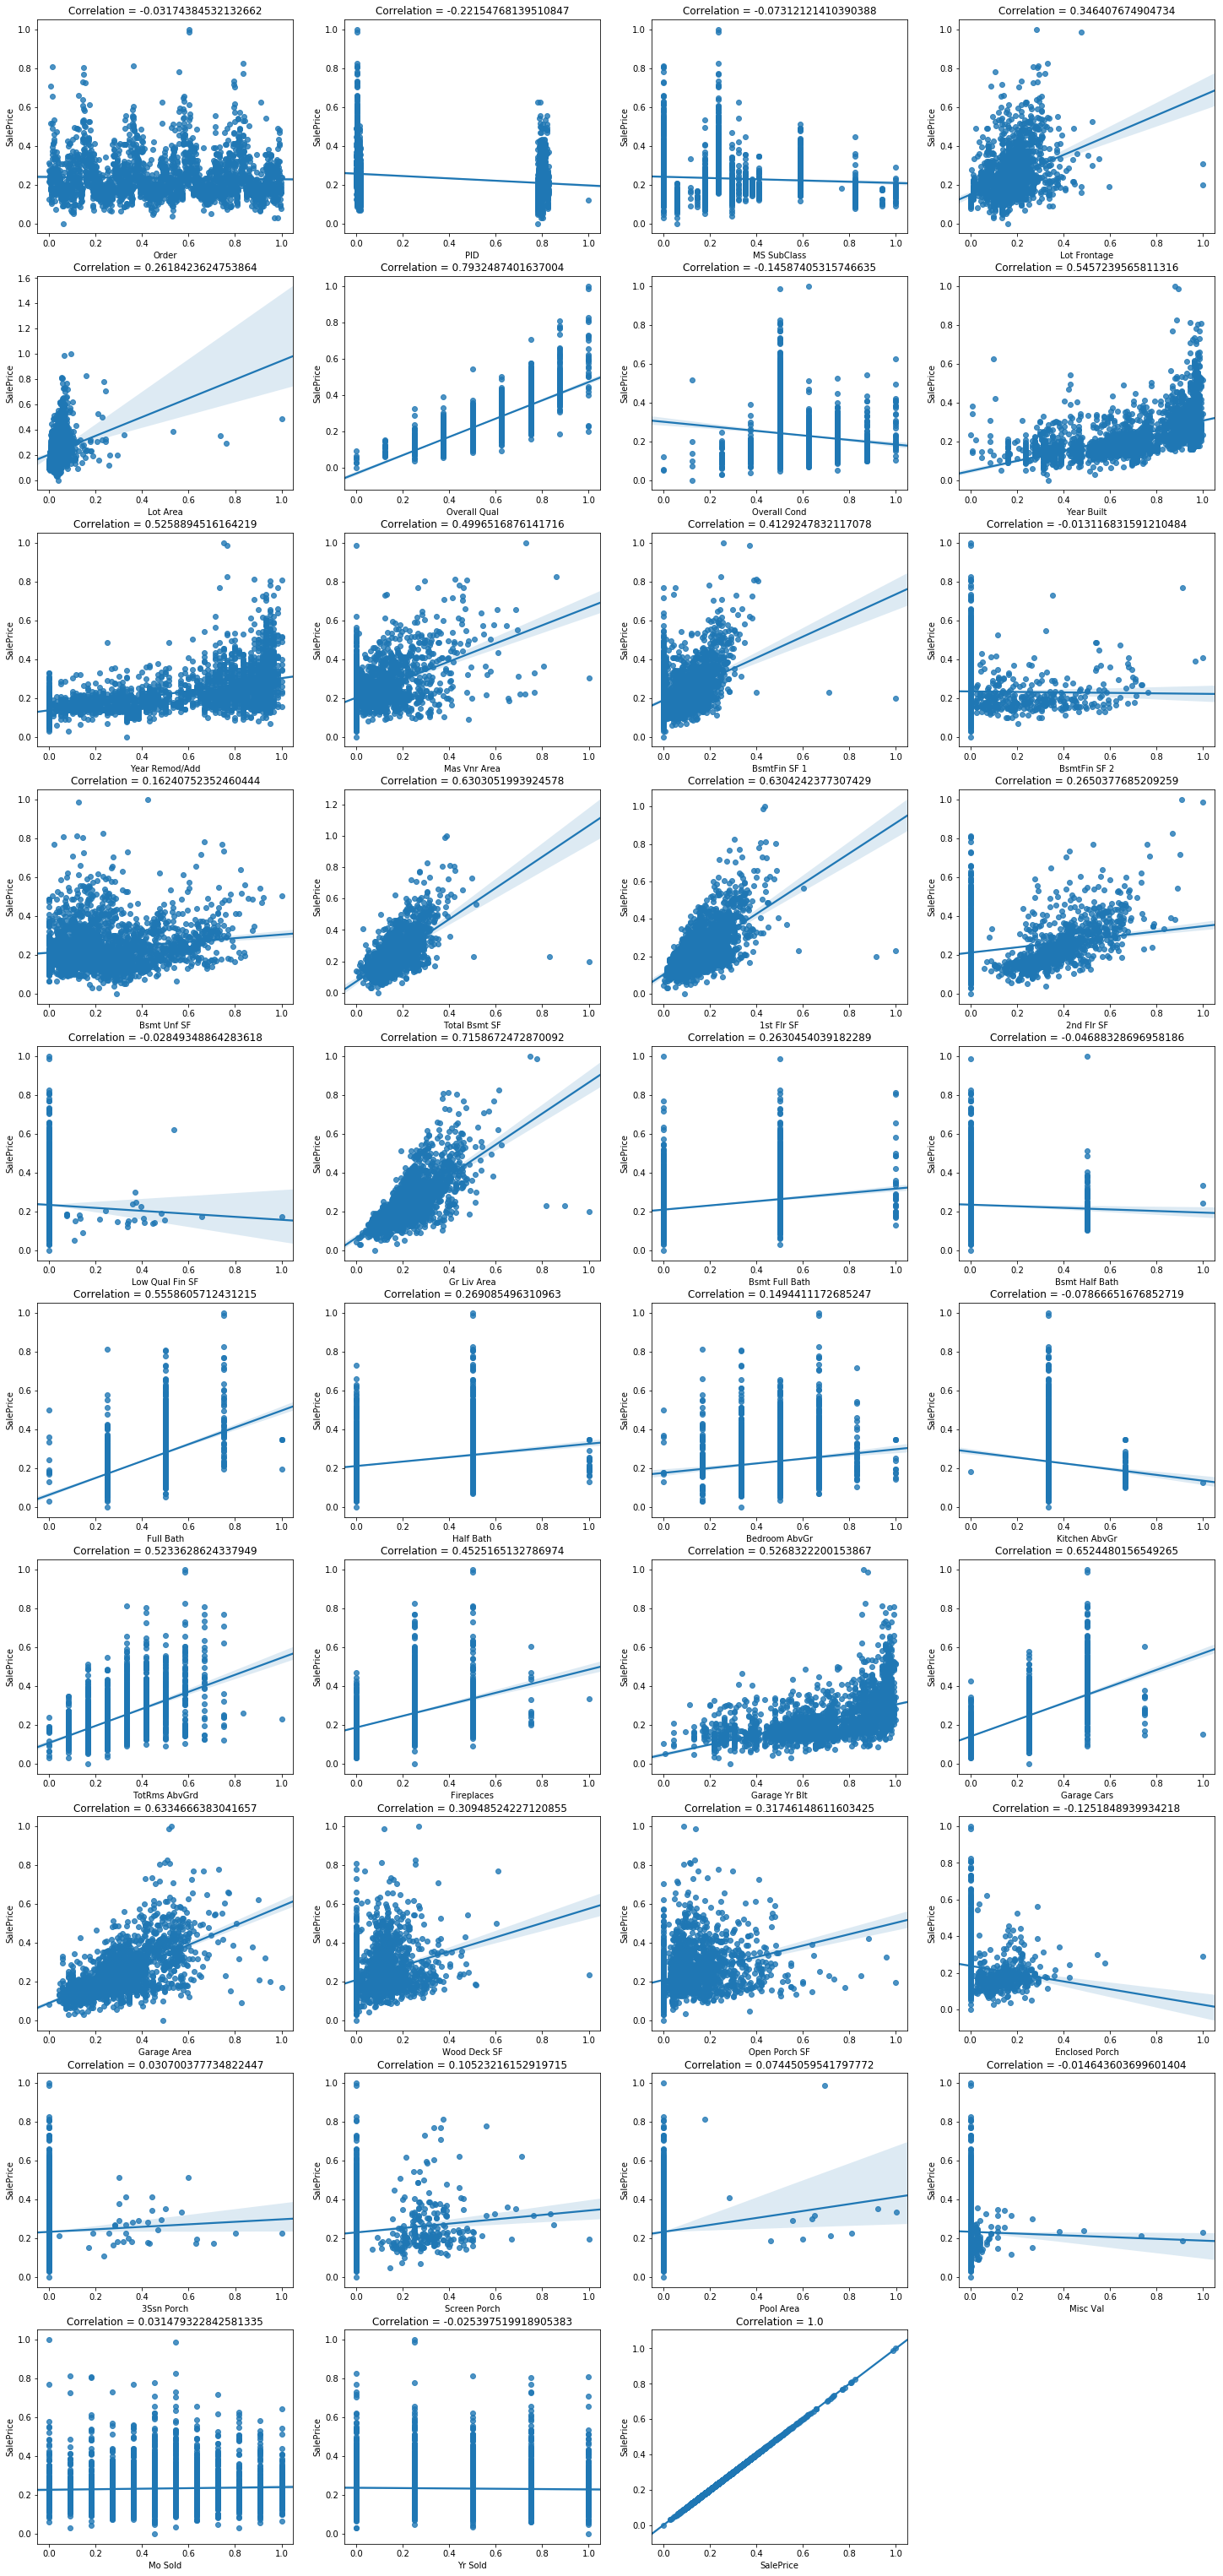

In [212]:
# Show correlation and outliers first by data visualization
plt.figure(figsize = [25, 55])
# Calculate the correlation for each numerical column with "SalePrice" column
corr = housing_normalized[housing_numerical.columns].corr()['SalePrice']
for i in range(len(housing_numerical.columns)): #range 0 to 38
    plt.subplot(10, 4, 1+i)
    sb.regplot(data = housing_normalized[housing_numerical.columns], x = housing_numerical.columns[i], y = 'SalePrice');
    plt.xlabel(housing_numerical.columns[i]);
    plt.ylabel('SalePrice');
    plt.title(f"Correlation = {corr[i]}")

In [213]:
# Get the numerical data only from housing DataFrame
housing_numerical = housing_normalized.select_dtypes(include= ['float64', 'int64']).copy()      # temp variable to store numerical data of "housing_normalized" DF
housing_numerical.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0.000000,0.000000,0.000000,0.410959,0.142420,0.500,0.500,0.618321,0.166667,0.0700,...,0.147472,0.108772,0.0,0.0,0.000000,0.0,0.000000,0.363636,1.0,0.272444
2,0.000341,0.000102,0.000000,0.202055,0.048246,0.375,0.625,0.625954,0.183333,0.0000,...,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,0.124238
3,0.000683,0.000104,0.000000,0.205479,0.060609,0.500,0.625,0.603053,0.133333,0.0675,...,0.275983,0.063158,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,0.214509
4,0.001024,0.000108,0.000000,0.246575,0.046087,0.625,0.500,0.679389,0.300000,0.0000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.272727,1.0,0.311517
5,0.001366,0.001672,0.235294,0.181507,0.058566,0.375,0.500,0.900763,0.800000,0.0000,...,0.148876,0.059649,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,0.238626


In [214]:
# Calculate corelation between every column and 'SalePrice' column
housing_numerical_corr = housing_numerical.corr()['SalePrice'].sort_values(ascending= False)
housing_numerical_corr

SalePrice          1.000000
Overall Qual       0.793249
Gr Liv Area        0.715867
Garage Cars        0.652448
Garage Area        0.633467
1st Flr SF         0.630424
Total Bsmt SF      0.630305
Full Bath          0.555861
Year Built         0.545724
Garage Yr Blt      0.526832
Year Remod/Add     0.525889
TotRms AbvGrd      0.523363
Mas Vnr Area       0.499652
Fireplaces         0.452517
BsmtFin SF 1       0.412925
Lot Frontage       0.346408
Open Porch SF      0.317461
Wood Deck SF       0.309485
Half Bath          0.269085
2nd Flr SF         0.265038
Bsmt Full Bath     0.263045
Lot Area           0.261842
Bsmt Unf SF        0.162408
Bedroom AbvGr      0.149441
Screen Porch       0.105232
Pool Area          0.074451
Mo Sold            0.031479
3Ssn Porch         0.030700
BsmtFin SF 2      -0.013117
Misc Val          -0.014644
Yr Sold           -0.025398
Low Qual Fin SF   -0.028493
Order             -0.031744
Bsmt Half Bath    -0.046883
MS SubClass       -0.073121
Kitchen AbvGr     -0

In [215]:
# Get columns with high correlation
high_corr_features = housing_numerical_corr[abs(housing_numerical_corr) > 0.5].sort_values(ascending=False)
high_corr_features

SalePrice         1.000000
Overall Qual      0.793249
Gr Liv Area       0.715867
Garage Cars       0.652448
Garage Area       0.633467
1st Flr SF        0.630424
Total Bsmt SF     0.630305
Full Bath         0.555861
Year Built        0.545724
Garage Yr Blt     0.526832
Year Remod/Add    0.525889
TotRms AbvGrd     0.523363
Name: SalePrice, dtype: float64

# Convert Categorical Data into numerical using One-Hot encoding.

In [246]:
housing_processed = pd.get_dummies(housing_normalized)
housing_processed.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.000000,0.000000,0.000000,0.410959,0.142420,0.500,0.500,0.618321,0.166667,0.0700,...,0,0,0,1,0,0,0,0,1,0
2,0.000341,0.000102,0.000000,0.202055,0.048246,0.375,0.625,0.625954,0.183333,0.0000,...,0,0,0,1,0,0,0,0,1,0
3,0.000683,0.000104,0.000000,0.205479,0.060609,0.500,0.625,0.603053,0.133333,0.0675,...,0,0,0,1,0,0,0,0,1,0
4,0.001024,0.000108,0.000000,0.246575,0.046087,0.625,0.500,0.679389,0.300000,0.0000,...,0,0,0,1,0,0,0,0,1,0
5,0.001366,0.001672,0.235294,0.181507,0.058566,0.375,0.500,0.900763,0.800000,0.0000,...,0,0,0,1,0,0,0,0,1,0


# Second Stage: Model Selection
We will choose **"DecisionTreeRegressor"** model for its efficiency and speed.

In [240]:
# Import libraries necessary for this project
from sklearn.model_selection import ShuffleSplit

# Split the output("SalePrice") and input("high_corr_features") from the normalized dataset

In [250]:
prices = housing_processed["SalePrice"].copy()
features = housing_processed.drop('SalePrice', axis=1)
features.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.000000,0.000000,0.000000,0.410959,0.142420,0.500,0.500,0.618321,0.166667,0.0700,...,0,0,0,1,0,0,0,0,1,0
2,0.000341,0.000102,0.000000,0.202055,0.048246,0.375,0.625,0.625954,0.183333,0.0000,...,0,0,0,1,0,0,0,0,1,0
3,0.000683,0.000104,0.000000,0.205479,0.060609,0.500,0.625,0.603053,0.133333,0.0675,...,0,0,0,1,0,0,0,0,1,0
4,0.001024,0.000108,0.000000,0.246575,0.046087,0.625,0.500,0.679389,0.300000,0.0000,...,0,0,0,1,0,0,0,0,1,0
5,0.001366,0.001672,0.235294,0.181507,0.058566,0.375,0.500,0.900763,0.800000,0.0000,...,0,0,0,1,0,0,0,0,1,0


In [252]:
prices.head()

0    0.272444
2    0.124238
3    0.214509
4    0.311517
5    0.238626
Name: SalePrice, dtype: float64

In [256]:
# Calculate minimum price of the data
minimum_price = np.array(price_column).min()
# Calculate maximum price of the data
maximum_price = np.array(price_column).max()
# Calculate mean price of the data
mean_price = np.array(price_column).mean()
# Calculate median price of the data
median_price = np.median(price_column)
# Calculate standard deviation of prices of the data
std_price = np.array(price_column).std()

# Show the calculated statistics
print("Statistics for Ames housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Ames housing dataset:

Minimum price: $12789
Maximum price: $755000
Mean price: $186405.72628827483
Median price $166650.0
Standard deviation of prices: $79486.72345339892


In [257]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen.
    """
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    # Return the score
    return score

In [258]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets (training = 80%, testing = test_size = 20%)
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)
print("Training and testing split was successful.")

Training and testing split was successful.


# Create get_best_model() function to get best parameter values for the model using GridSearch

In [337]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def get_best_model(X, y):
    """ Performs grid search over the 'max_depth', 'min_samples_leaf' and 'min_samples_split' parameters for a 
        decision tree regressor trained on the input data [X, y]. """
    cv_sets = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)
    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[5,6,7,8,9,10,11,12,13,14,15],'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15],'min_samples_split':[2,3,4,5,6,7,8,9,10]}
    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid= params, scoring=scoring_fnc, cv=cv_sets)
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    # Return the optimal model after fitting the data
    return grid.best_estimator_

# Fit the training data to the model using grid search to get the best model parameters

In [366]:
# reg = get_best_model(X_train, y_train)
# after many times of training, this is the best model selected by GridSearch and give best predections
reg = DecisionTreeRegressor(max_depth= 13, min_samples_leaf= 11, min_samples_split=2, random_state= 0)

In [367]:
print("For the optimal model: Parameter 'max_depth' is {}, 'min_samples_leaf' is {}, 'min_samples_split' is {}"
      .format(reg.get_params()['max_depth'], 
              reg.get_params()['min_samples_leaf'], 
              reg.get_params()['min_samples_split']))


For the optimal model: Parameter 'max_depth' is 13, 'min_samples_leaf' is 11, 'min_samples_split' is 2


# Third Stage: Fitting the Model

In [368]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13, min_samples_leaf=11, random_state=0)

# Fourth Stage: Testing the Model

In [369]:
# y_test_pred = reg.predict(X_test)
train_predictions = reg.predict(X_train)
test_predictions = reg.predict(X_test)

In [370]:
# performance_metric(y_test, y_test_pred)
print('The Training R2 Score is', performance_metric(y_train, train_predictions))
print('The Testing R2 Score is', performance_metric(y_test, test_predictions))

The Training R2 Score is 0.897870670002
The Testing R2 Score is 0.862011086199


# Fifth Stage: Price Prediction

In [375]:
housing[high_corr_features.index].head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Total Bsmt SF,Full Bath,Year Built,Garage Yr Blt,Year Remod/Add,TotRms AbvGrd
0,215000,6,1656,2.0,528.0,1656,1080.0,1,1960,1960.0,1960,7
2,105000,5,896,1.0,730.0,896,882.0,1,1961,1961.0,1961,5
3,172000,6,1329,1.0,312.0,1329,1329.0,1,1958,1958.0,1958,6
4,244000,7,2110,2.0,522.0,2110,2110.0,2,1968,1968.0,1968,8
5,189900,5,1629,2.0,482.0,928,928.0,2,1997,1997.0,1998,6


# Create a function to take the predict row with 
# the same format and values as the original data and predict the price

In [376]:
def Prediction(predict_row, model):
    ''' This function takes the prediction row in the original format of the dataset and append it to the original dataset
        to be able to convert this row into the format of the preprocessed data that we give to the model to predict the price correctly
    '''
    original_housing = pd.read_csv("Ames_Housing_Data1.tsv", sep='\t')
    price_column = original_housing[['SalePrice']]
    predict_row = original_housing.append(predict_row)
    predict_row[housing_numerical.columns] = MinMaxScaler().fit_transform(predict_row[housing_numerical.columns])
    predict_row = pd.get_dummies(predict_row).iloc[[predict_row.shape[0] - 1], :]
    predict_row = predict_row[housing_processed.columns]
    y_pred_log1p = model.predict(predict_row.drop('SalePrice', axis=1))
    price_scaler = MinMaxScaler()
    price_column = price_scaler.fit_transform(price_column)
    y_pred_original = price_scaler.inverse_transform(y_pred_log1p.reshape(-1, 1))
    return y_pred_original

In [378]:
original_housing = pd.read_csv("Ames_Housing_Data1.tsv", sep='\t')
Predicted_Price = Prediction(original_housing.iloc[[0], :], reg1)
Predicted_Price

array([[ 223144.9375]])